In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer

In [41]:
from sklearn.decomposition import PCA

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [419]:
X_train_df = pd.read_csv("../data/offline/X_train.csv", index_col=0)
y_train_df = pd.read_csv("../data/offline/y_train.csv", index_col=0)
X_test_df = pd.read_csv("../data/offline/X_test.csv", index_col=0)
combine_df = pd.concat([X_train_df, X_test_df])

In [420]:
combine_df.shape

(2919, 75)

In [421]:
# pca = PCA(n_components=40)
# pca.fit(combine_df.values)
# pca_train_X = pca.transform(X_train_df.values)
# pca_train_X.shape

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df.values, y_train_df['SalePrice'].values, test_size=0.5, random_state=1729)

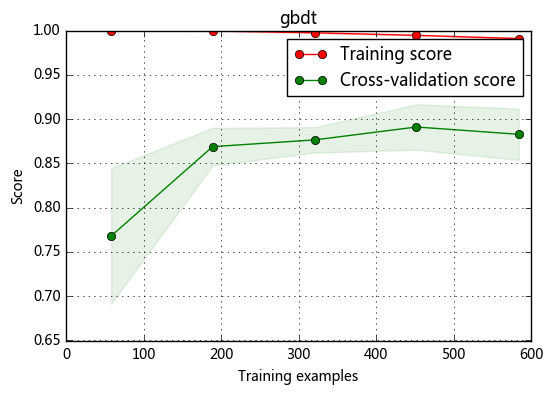

In [423]:
gbdt_regressor = GradientBoostingRegressor(learning_rate=0.2, n_estimators=100,  min_samples_split=2, min_samples_leaf=2, max_depth=3)
plot_learning_curve(gbdt_regressor, 'gbdt', X_train, y_train, cv=5)
plt.show()


In [424]:
gbdt_regressor.fit(X_train, y_train)
gbdt_regressor.score(X_test, y_test)

0.82504305289758606

In [425]:
0.82114351004583741
GradientBoostingRegressor(learning_rate=0.2, n_estimators=100,  min_samples_split=2, min_samples_leaf=2, max_depth=3)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [426]:
X_train_df.columns

Index(['GrLivArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'LotShape',
       'LotArea', 'LotFrontage', 'Alley_Access', 'Alley', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'Has_Bsmt', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Has_Fireplace',
       'FireplaceQu', 'Has_Garage', 'GarageType', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'Enclos

In [427]:
gbdt_regressor.feature_importances_ 

array([ 0.07047521,  0.04653051,  0.05000074,  0.04085455,  0.00318781,
        0.0755239 ,  0.02929045,  0.        ,  0.00337723,  0.00249638,
        0.00597989,  0.03389342,  0.01180883,  0.        ,  0.        ,
        0.0090656 ,  0.02189948,  0.04030701,  0.02669863,  0.00534295,
        0.        ,  0.02180815,  0.00750355,  0.00564248,  0.03247701,
        0.00165942,  0.00158201,  0.0034451 ,  0.        ,  0.00452382,
        0.00011999,  0.00383807,  0.00110353,  0.        ,  0.01312068,
        0.04243333,  0.00278891,  0.00489716,  0.0007156 ,  0.00306563,
        0.02417704,  0.02194511,  0.00612498,  0.00543621,  0.        ,
        0.00819713,  0.00369973,  0.00122133,  0.00544391,  0.0142487 ,
        0.0127409 ,  0.02121134,  0.00555786,  0.01128222,  0.        ,
        0.01031808,  0.01152866,  0.00360155,  0.057936  ,  0.        ,
        0.00061909,  0.00067414,  0.01864965,  0.02678023,  0.00196668,
        0.01099641,  0.0118614 ,  0.        ,  0.00979722,  0.  

In [428]:
importance_df = pd.DataFrame([X_train_df.columns, gbdt_regressor.feature_importances_ ]).T

In [429]:
importance_df = importance_df.rename(columns={0:'feature', 1:'contribution'})

In [430]:
importance_df.sort_values('contribution')

,feature,contribution
14,BldgType,0
20,RoofMatl,0
28,Has_Bsmt,0
13,Condition2,0
54,Has_Garage,0
33,BsmtFinType2,0
7,Alley_Access,0
59,GarageQual,0
44,BsmtHalfBath,0
69,PoolQC,0


In [431]:
y_predict = gbdt_regressor.predict(X_test_df.values)

In [432]:
len(y_test)

730

In [433]:
y_predict_df = pd.DataFrame(y_predict, index=X_test_df.index)

In [434]:
y_predict_df = y_predict_df.rename(columns={0:'SalePrice'})

In [435]:
y_predict_df['SalePrice'] = y_predict_df['SalePrice'] * 1.05

In [437]:
y_predict_df.to_csv('../data/online/predict.csv', header = True, index=True)

In [438]:
y_predict_df.describe()

,SalePrice
count,1459.000000
mean,188193.189064
std,80328.253528
min,37066.214621
25%,136691.033732
50%,168075.929384
75%,221675.297534
max,617284.164052
